In [1]:
# Set up environment

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline 
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


In [2]:
# Load data

pre = pd.read_csv('pre_mv.csv')
post = pd.read_csv('post_mv.csv')
long = pd.read_csv('long_mv.csv')

# Pre-training commonality sheet

pre_common = pd.read_csv('pretrain_commonality.csv')

In [3]:
# Retrieve the external
post_id = post['ExternalReference'].to_numpy()
long_id = long['ExternalReference'].to_numpy()
pre_id = pre['ExternalReference'].to_numpy()
#pre_common.loc[86,'ExternalReference']
#'K1016' in post_id
#post_id

In [4]:
# Script to check if the IDs in pre-training are in post and long

for i in range(96):
    check_post = pre_common.loc[i,'ExternalReference'] in post_id
    if check_post == 1:
        pre_common.loc[i,'Post']= 1
    else:
        pre_common.loc[i,'Post']= 0
    check_long = pre_common.loc[i,'ExternalReference'] in long_id
    if check_long == 1:
        pre_common.loc[i,'Long'] = 1
    else:
        pre_common.loc[i,'Long']= 0

In [5]:
pre_common.to_csv('in_common_with_pre.csv',index=False)

In [6]:
# MV in all three time points
pre_common.loc[(pre_common['Post']==1)&(pre_common['Long']==1),'ExternalReference']
# MV only in baseline
pre_common.loc[(pre_common['Post']==0)&(pre_common['Long']==0),'ExternalReference'].shape
# MV only in pre and post
pre_common.loc[(pre_common['Post']==1)&(pre_common['Long']==0),'ExternalReference'].shape
# MV only in pre and long
pre_common.loc[(pre_common['Post']==0)&(pre_common['Long']==1),'ExternalReference'].shape

86    K1016
Name: ExternalReference, dtype: object

(79,)

(10,)

(6,)

In [7]:
# Read in post commonality sheet

post_common = pd.read_csv('post_commonality.csv')
post_common.insert(1,'Pre',np.nan)


In [8]:
# Check what post has in common with long
for i in range(39):
    check_long = post_common.loc[i,'ExternalReference'] in long_id
    if check_long == 1:
        post_common.loc[i,'Long'] = 1
    else:
        post_common.loc[i,'Long']= 0
    check_pre = post_common.loc[i,'ExternalReference'] in pre_id
    if check_pre == 1:
        post_common.loc[i,'Pre'] = 1
    else:
        post_common.loc[i,'Pre']= 0

In [9]:
# The only participant in common is the one that has missing values at all three tps
post_common['Long'].value_counts()
post_common['Pre'].value_counts()

0.0    38
1.0     1
Name: Long, dtype: int64

0.0    28
1.0    11
Name: Pre, dtype: int64

In [10]:
# Read in post commonality sheet

long_common = pd.read_csv('long_commonality.csv')

In [11]:
# Check what long has in common with pre and post

# Script to check if the IDs in pre-training are in post and long

for i in range(24):
    check_pre = long_common.loc[i,'ExternalReference'] in pre_id
    if check_pre == 1:
        long_common.loc[i,'Pre']= 1
    else:
        long_common.loc[i,'Pre']= 0
    check_post = long_common.loc[i,'ExternalReference'] in post_id
    if check_post == 1:
        long_common.loc[i,'Post'] = 1
    else:
        long_common.loc[i,'Post']= 0

In [12]:
long_common['Post'].value_counts()
long_common['Pre'].value_counts()

0.0    23
1.0     1
Name: Post, dtype: int64

0.0    17
1.0     7
Name: Pre, dtype: int64

In [13]:
d = [10,9,10]
type(d)

list

In [14]:
pre_only_df = pre_common.loc[(pre_common['Post']==0)&(pre_common['Long']==0),:]
pre_only_id = pre_only_df['ExternalReference']
pre_only_df = pre_only_id.to_frame()
pre_only_df.insert(1,'pre_mv_count',np.zeros(79,dtype=int))

In [15]:
pre_only_idx = pre_only_df.index
for i in pre_only_idx:
    pre_only_df.loc[i,'pre_mv_count'] = pre.loc[pre['ExternalReference']==pre_only_id[i],'0'].to_list()

<BarContainer object of 10 artists>

<BarContainer object of 10 artists>

Text(0.5, 0, 'Number of Missing Values in Survey')

Text(0, 0.5, 'Participant')

Text(0, 0.5, 'Participant')

Text(0.5, 1.0, 'Participants with Missing Values in Baseline Data Only')

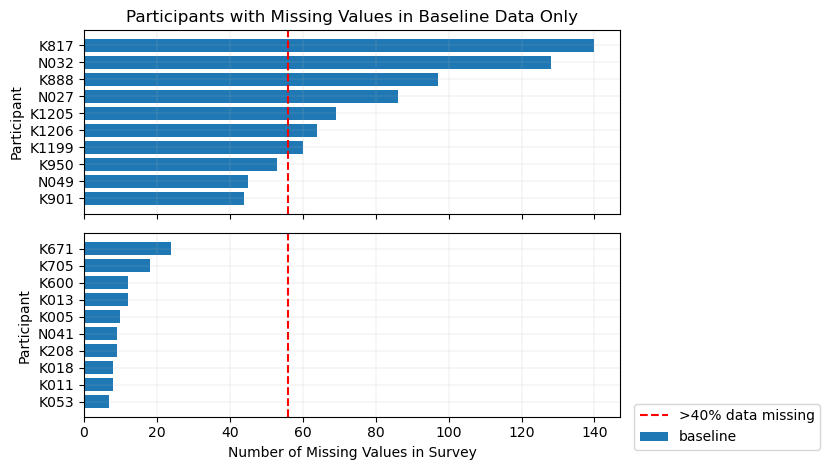

In [16]:
pre_only_df_sort = pre_only_df.sort_values(by='pre_mv_count',ascending=False)
pre_only_x = pre_only_df_sort['ExternalReference']
pre_only_y = pre_only_df_sort['pre_mv_count']
pre_only_x = pre_only_x.to_list()
pre_only_y = pre_only_y.to_list()

pre_only_x.reverse()
pre_only_y.reverse()
plt.style.use('default')

fig, (ax1, ax2) = plt.subplots(nrows=2,ncols=1,sharex=True)

ax1.barh(pre_only_x[69:79],pre_only_y[69:79],label='baseline')
ax1.axvline(x=56,linestyle='--',color='r',label='>40% data missing')
ax2.barh(pre_only_x[58:68],pre_only_y[58:68],label='baseline')
ax2.axvline(x=56,linestyle='--',color='r',label='>40% data missing')
ax2.set_xlabel('Number of Missing Values in Survey')
ax1.set_ylabel('Participant')
ax2.set_ylabel('Participant')
ax1.set_title('Participants with Missing Values in Baseline Data Only')
ax1.grid(linewidth='0.15')
ax2.grid(linewidth='0.15')
plt.tight_layout()
#ax1.legend()
#ax2.legend()
ax1.legend(loc='upper center', bbox_to_anchor=(1.2, -1), shadow=False, ncol=1)
ax = plt.gca()

fig.savefig('check.png')

In [17]:
# POST ONLY Plots

post_only_df = post_common.loc[(post_common['Pre']==0)&(post_common['Long']==0),:]
post_only_id = post_only_df['ExternalReference']
post_only_df = post_only_id.to_frame()
post_only_df.insert(1,'post_mv_count',np.zeros(28,dtype=int))

post_only_idx = post_only_df.index
for i in post_only_idx:
    post_only_df.loc[i,'post_mv_count'] = post.loc[post['ExternalReference']==post_only_id[i],'0'].to_list()

<BarContainer object of 14 artists>

<BarContainer object of 13 artists>

Text(0.5, 0, 'Number of Missing Values in Survey')

Text(0, 0.5, 'Participant')

Text(0, 0.5, 'Participant')

Text(0.5, 1.0, 'Participants with Missing Values in Post-training Data Only')

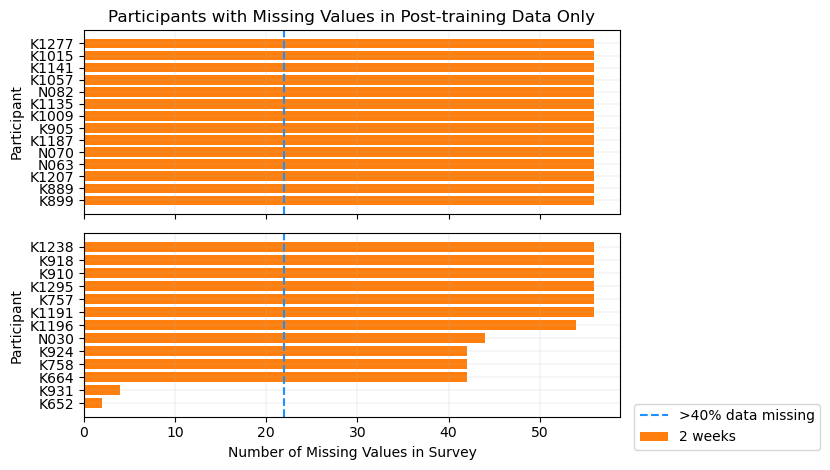

In [18]:
post_only_df_sort = post_only_df.sort_values(by='post_mv_count',ascending=False)
post_only_x = post_only_df_sort['ExternalReference']
post_only_y = post_only_df_sort['post_mv_count']
post_only_x = post_only_x.to_list()
post_only_y = post_only_y.to_list()

post_only_x.reverse()
post_only_y.reverse()
plt.style.use('default')

fig, (ax1, ax2) = plt.subplots(nrows=2,ncols=1,sharex=True)

ax1.barh(post_only_x[14:28],post_only_y[14:28],color='tab:orange',label='2 weeks')
ax1.axvline(x=22,linestyle='--',color='dodgerblue',label='>40% data missing')
ax2.barh(post_only_x[0:13],post_only_y[0:13],color='tab:orange',label='2 weeks')
ax2.axvline(x=22,linestyle='--',color='dodgerblue',label='>40% data missing')
ax2.set_xlabel('Number of Missing Values in Survey')
ax1.set_ylabel('Participant')
ax2.set_ylabel('Participant')
ax1.set_title('Participants with Missing Values in Post-training Data Only')
ax1.grid(linewidth='0.15')
ax2.grid(linewidth='0.15')
plt.tight_layout()
#ax1.legend()
#ax2.legend()
ax1.legend(loc='upper center', bbox_to_anchor=(1.2, -1), shadow=False, ncol=1)


In [19]:
# LONG ONLY Plots

long_only_df = long_common.loc[(long_common['Pre']==0)&(long_common['Post']==0),:]
long_only_id = long_only_df['ExternalReference']
long_only_df = long_only_id.to_frame()
long_only_df.insert(1,'long_mv_count',np.zeros(17,dtype=int))

long_only_idx = long_only_df.index
for i in long_only_idx:
    long_only_df.loc[i,'long_mv_count'] = long.loc[long['ExternalReference']==long_only_id[i],'0'].to_list()

<BarContainer object of 8 artists>

<BarContainer object of 8 artists>

Text(0.5, 0, 'Number of Missing Values in Survey')

Text(0, 0.5, 'Participant')

Text(0, 0.5, 'Participant')

Text(0.5, 1.0, 'Participants with Missing Values in Long-term Data Only')

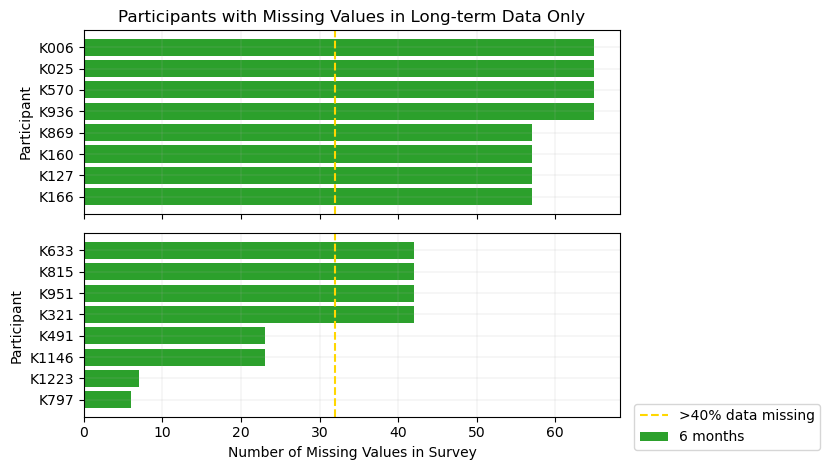

In [20]:
long_only_df_sort = long_only_df.sort_values(by='long_mv_count',ascending=False)
long_only_x = long_only_df_sort['ExternalReference']
long_only_y = long_only_df_sort['long_mv_count']
long_only_x = long_only_x.to_list()
long_only_y = long_only_y.to_list()

long_only_x.reverse()
long_only_y.reverse()
plt.style.use('default')

fig, (ax1, ax2) = plt.subplots(nrows=2,ncols=1,sharex=True)

ax1.barh(long_only_x[9:17],long_only_y[9:17],color='tab:green',label='6 months')
ax1.axvline(x=32,linestyle='--',color='gold',label='>40% data missing')
ax2.barh(long_only_x[0:8],long_only_y[0:8],color='tab:green',label='6 months')
ax2.axvline(x=32,linestyle='--',color='gold',label='>40% data missing')
ax2.set_xlabel('Number of Missing Values in Survey')
ax1.set_ylabel('Participant')
ax2.set_ylabel('Participant')
ax1.set_title('Participants with Missing Values in Long-term Data Only')
ax1.grid(linewidth='0.15')
ax2.grid(linewidth='0.15')
plt.tight_layout()
#ax1.legend()
#ax2.legend()
ax1.legend(loc='upper center', bbox_to_anchor=(1.2, -1), shadow=False, ncol=1)

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

Text(0, 0.5, 'Number of Missing Values')

Text(0.5, 0, 'Participant')

Text(0.5, 1.0, 'Participant with Missing Values Across All 3 Timepoints')

[Text(0, 0, 'K1016')]

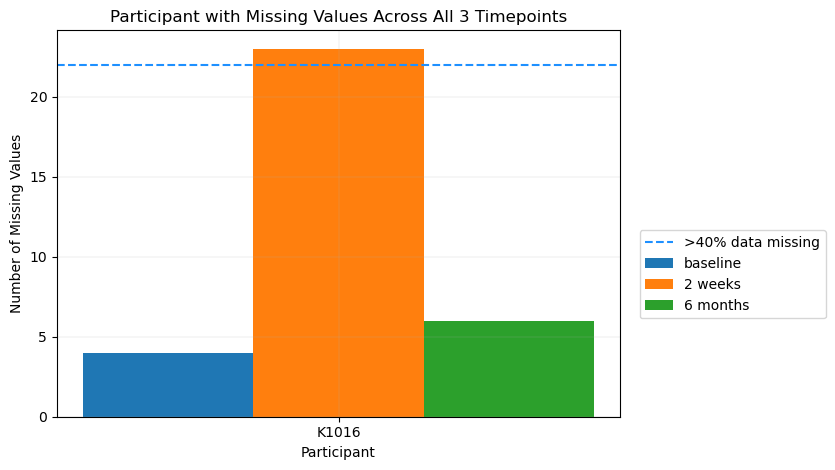

In [21]:
# MV at all 3 TPs - K1016
all_x = ['K1016']
x_indexes = np.arange(len(all_x))
pre_all_y = pre.loc[pre['ExternalReference']=='K1016','0'].to_list()
post_all_y = post.loc[post['ExternalReference']=='K1016','0'].to_list()
long_all_y = long.loc[long['ExternalReference']=='K1016','0'].to_list()
width = 0.25

fig, ax = plt.subplots()
ax.bar(x_indexes - width,pre_all_y,width=width, label='baseline')
ax.bar(x_indexes,post_all_y, width=width,label='2 weeks')
ax.bar(x_indexes+width,long_all_y,width=width ,label='6 months')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Missing Values')
ax.set_xlabel('Participant')
ax.set_title('Participant with Missing Values Across All 3 Timepoints')
ax.set_xticks(x_indexes)
ax.set_xticklabels(all_x)
ax.grid(linewidth='0.15')
plt.tight_layout()
ax.axhline(y=22,linestyle='--',color='dodgerblue',label='>40% data missing')
ax.legend(loc='upper center', bbox_to_anchor=(1.2, 0.5), shadow=False, ncol=1)



In [22]:
# PRE AND POST
pre_post_df = pre_common.loc[(pre_common['Post']==1)&(pre_common['Long']==0),:]
pre_post_id = pre_post_df['ExternalReference']
pre_post_df = pre_post_id.to_frame()
pre_post_df.insert(1,'pre_mv_count',np.zeros(10,dtype=int))
pre_post_df.insert(2,'post_mv_count',np.zeros(10,dtype=int))

In [23]:
pre_post_idx = pre_post_df.index
for i in pre_post_idx:
    pre_post_df.loc[i,'pre_mv_count'] = pre.loc[pre['ExternalReference']==pre_post_id[i],'0'].to_list()
    pre_post_df.loc[i,'post_mv_count'] = post.loc[post['ExternalReference']==pre_post_id[i],'0'].to_list()

<BarContainer object of 10 artists>

<BarContainer object of 10 artists>

Text(0, 0.5, 'Number of Missing Values')

Text(0.5, 0, 'Participants')

Text(0.5, 1.0, 'Participants with Missing Values in Pre-training and Post-training')

[Text(0, 0, 'K571'),
 Text(1, 0, 'K654'),
 Text(2, 0, 'K704'),
 Text(3, 0, 'K868'),
 Text(4, 0, 'N059'),
 Text(5, 0, 'K1058'),
 Text(6, 0, 'N068'),
 Text(7, 0, 'K1023'),
 Text(8, 0, 'K1144'),
 Text(9, 0, 'K1189')]

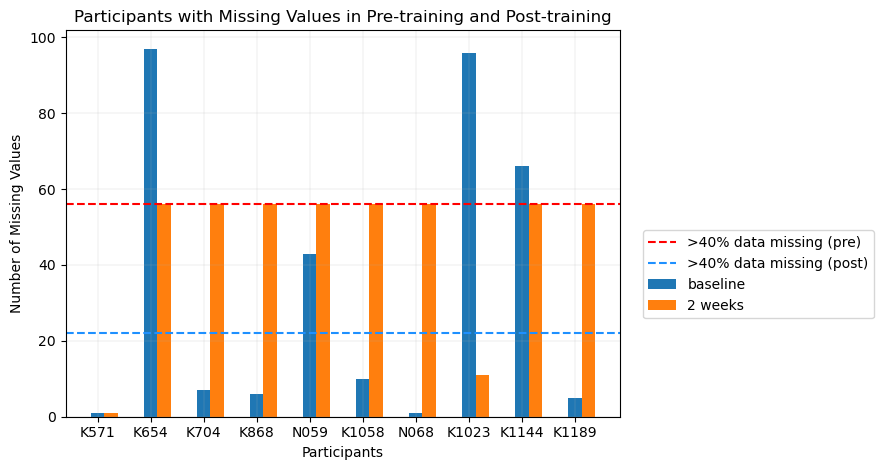

In [24]:
# PLOT PRE AND POST
pre_post_x = pre_post_id.to_list()
pre_post_indexes = np.arange(len(pre_post_x))
width = 0.25

pre_prepost_y = pre_post_df['pre_mv_count'].to_list()
post_prepost_y = pre_post_df['post_mv_count'].to_list()

fig, ax = plt.subplots()
ax.bar(pre_post_indexes,pre_prepost_y,width=width, label='baseline')
ax.bar(pre_post_indexes+width,post_prepost_y, width=width,label='2 weeks')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Missing Values')
ax.set_xlabel('Participants')
ax.set_title('Participants with Missing Values in Pre-training and Post-training')
ax.set_xticks(pre_post_indexes)
ax.set_xticklabels(pre_post_x)
ax.grid(linewidth='0.15')
plt.tight_layout()
ax.axhline(y=56,linestyle='--',color='red',label='>40% data missing (pre)')
ax.axhline(y=22,linestyle='--',color='dodgerblue',label='>40% data missing (post)')
ax.legend(loc='upper center', bbox_to_anchor=(1.25, 0.5), shadow=False, ncol=1)

In [25]:
# PRE AND LONG

pre_long_df = pre_common.loc[(pre_common['Post']==0)&(pre_common['Long']==1),:]
pre_long_id = pre_long_df['ExternalReference']
pre_long_df = pre_long_id.to_frame()
pre_long_df.insert(1,'pre_mv_count',np.zeros(6,dtype=int))
pre_long_df.insert(2,'long_mv_count',np.zeros(6,dtype=int))

In [26]:
pre_long_idx = pre_long_df.index
for i in pre_long_idx:
    pre_long_df.loc[i,'pre_mv_count'] = pre.loc[pre['ExternalReference']==pre_long_id[i],'0'].to_list()
    pre_long_df.loc[i,'long_mv_count'] = long.loc[long['ExternalReference']==pre_long_id[i],'0'].to_list()
    
    

In [27]:
pre_long_df

,ExternalReference,pre_mv_count,long_mv_count
24,K564,1,8
31,K009,1,65
50,K854,42,6
51,K964,42,23
80,N058,7,6
81,K911,1,42


<BarContainer object of 6 artists>

<BarContainer object of 6 artists>

Text(0, 0.5, 'Number of Missing Values')

Text(0.5, 0, 'Participants')

Text(0.5, 1.0, 'Participants with Missing Values in Pre-training and Long-term')

[Text(0, 0, 'K564'),
 Text(1, 0, 'K009'),
 Text(2, 0, 'K854'),
 Text(3, 0, 'K964'),
 Text(4, 0, 'N058'),
 Text(5, 0, 'K911')]

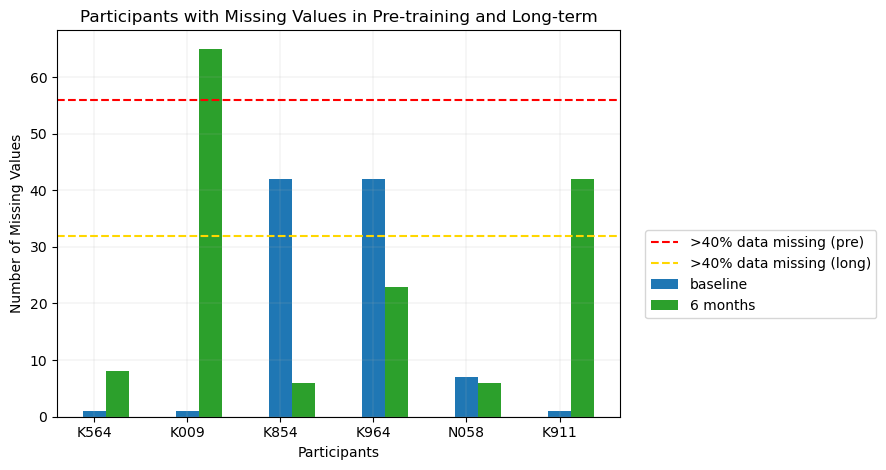

In [28]:
# PLOT PRE AND LONG
pre_long_x = pre_long_id.to_list()
pre_long_indexes = np.arange(len(pre_long_x))
width = 0.25

pre_prelong_y = pre_long_df['pre_mv_count'].to_list()
long_prelong_y = pre_long_df['long_mv_count'].to_list()

fig, ax = plt.subplots()
ax.bar(pre_long_indexes,pre_prelong_y,width=width, label='baseline')
ax.bar(pre_long_indexes+width,long_prelong_y, width=width,label='6 months',color='tab:green')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Missing Values')
ax.set_xlabel('Participants')
ax.set_title('Participants with Missing Values in Pre-training and Long-term')
ax.set_xticks(pre_long_indexes)
ax.set_xticklabels(pre_long_x)
ax.grid(linewidth='0.15')
plt.tight_layout()
ax.axhline(y=56,linestyle='--',color='red',label='>40% data missing (pre)')
ax.axhline(y=32,linestyle='--',color='gold',label='>40% data missing (long)')
ax.legend(loc='upper center', bbox_to_anchor=(1.25, 0.5), shadow=False, ncol=1)